<a href="https://colab.research.google.com/github/Ananda0047/Energy-Demand-Prediction/blob/main/Energy_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Modules

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

# Dataset Observation and Preprocessing

## Importing Dataset and overview

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Final_Data.xlsx to Final_Data.xlsx


In [3]:
import io
df_main = pd.read_excel(io.BytesIO(uploaded['Final_Data.xlsx']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
df=df_main.copy()
df.shape

(113880, 17)

In [5]:
df.head(3)

,Year,Month,Day,Time,DHI,DNI,GHI,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Power(KWh)
0,2008,1,1,0:0,0,0,0,15.0,20.0,1010,73.87,28.4,1.0,0,0,0,-0.017695
1,2008,1,1,1:0,0,0,0,15.0,20.0,1010,74.88,40.8,1.1,0,0,0,-0.017695
2,2008,1,1,2:0,0,0,0,15.0,19.0,1010,76.46,44.6,1.3,0,0,0,-0.017695


## Closer look into categorical data

## Handling missing Values

In [6]:
print(df.isnull().sum())

Year                 0
Month                0
Day                  0
Time                 0
DHI                  0
DNI                  0
GHI                  0
Dew Point            0
Temperature          0
Pressure             0
Relative Humidity    0
Wind Direction       0
Wind Speed           0
Clearsky DHI         0
Clearsky DNI         0
Clearsky GHI         0
Power(KWh)           0
dtype: int64


In [7]:
df.shape

(113880, 17)

## Determining feature correlation

In [8]:
abs_corr_features = df.corr().abs()

rearrange = (abs_corr_features.where(
    np.triu(np.ones(abs_corr_features.shape),
            k=1).astype(bool)).stack().sort_values(ascending=False))

print(rearrange)

GHI           Power(KWh)      9.871822e-01
Clearsky DNI  Clearsky GHI    9.567102e-01
DHI           Clearsky GHI    9.359076e-01
GHI           Clearsky GHI    9.295950e-01
DNI           Power(KWh)      9.259015e-01
                                  ...     
Month         Temperature     4.981106e-04
Day           Clearsky DNI    3.127823e-04
              Clearsky GHI    2.099061e-04
Year          Month           6.455863e-14
              Day             2.239811e-15
Length: 120, dtype: float64


### Feature correlation heatmap

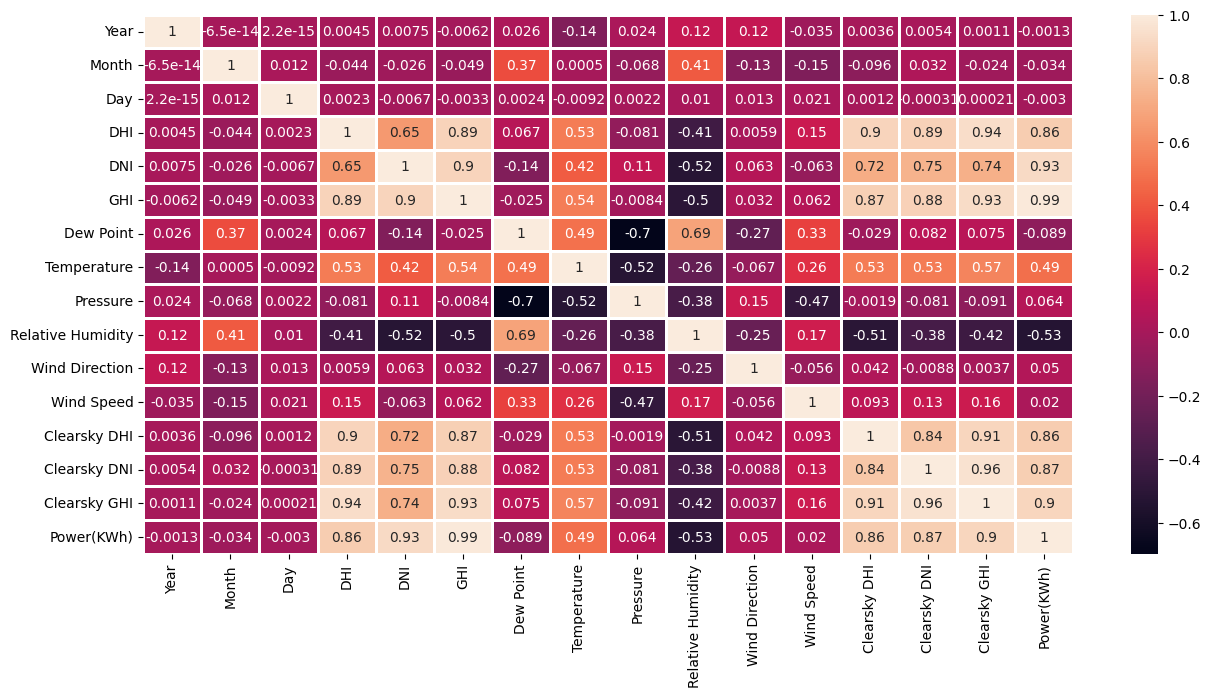

In [9]:
plt.figure(figsize=(15,7))
corr=df.corr()
sns.heatmap(corr,annot=True,linewidth=1)
plt.show()

## Dropping  highly correlated column

In [10]:
#df.drop("Pressure at weather station", axis=1, inplace=True)

In [11]:
#df.head()

## Distribution of categorical data



In [12]:
df.head(1)

,Year,Month,Day,Time,DHI,DNI,GHI,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Power(KWh)
0,2008,1,1,0:0,0,0,0,15.0,20.0,1010,73.87,28.4,1.0,0,0,0,-0.017695


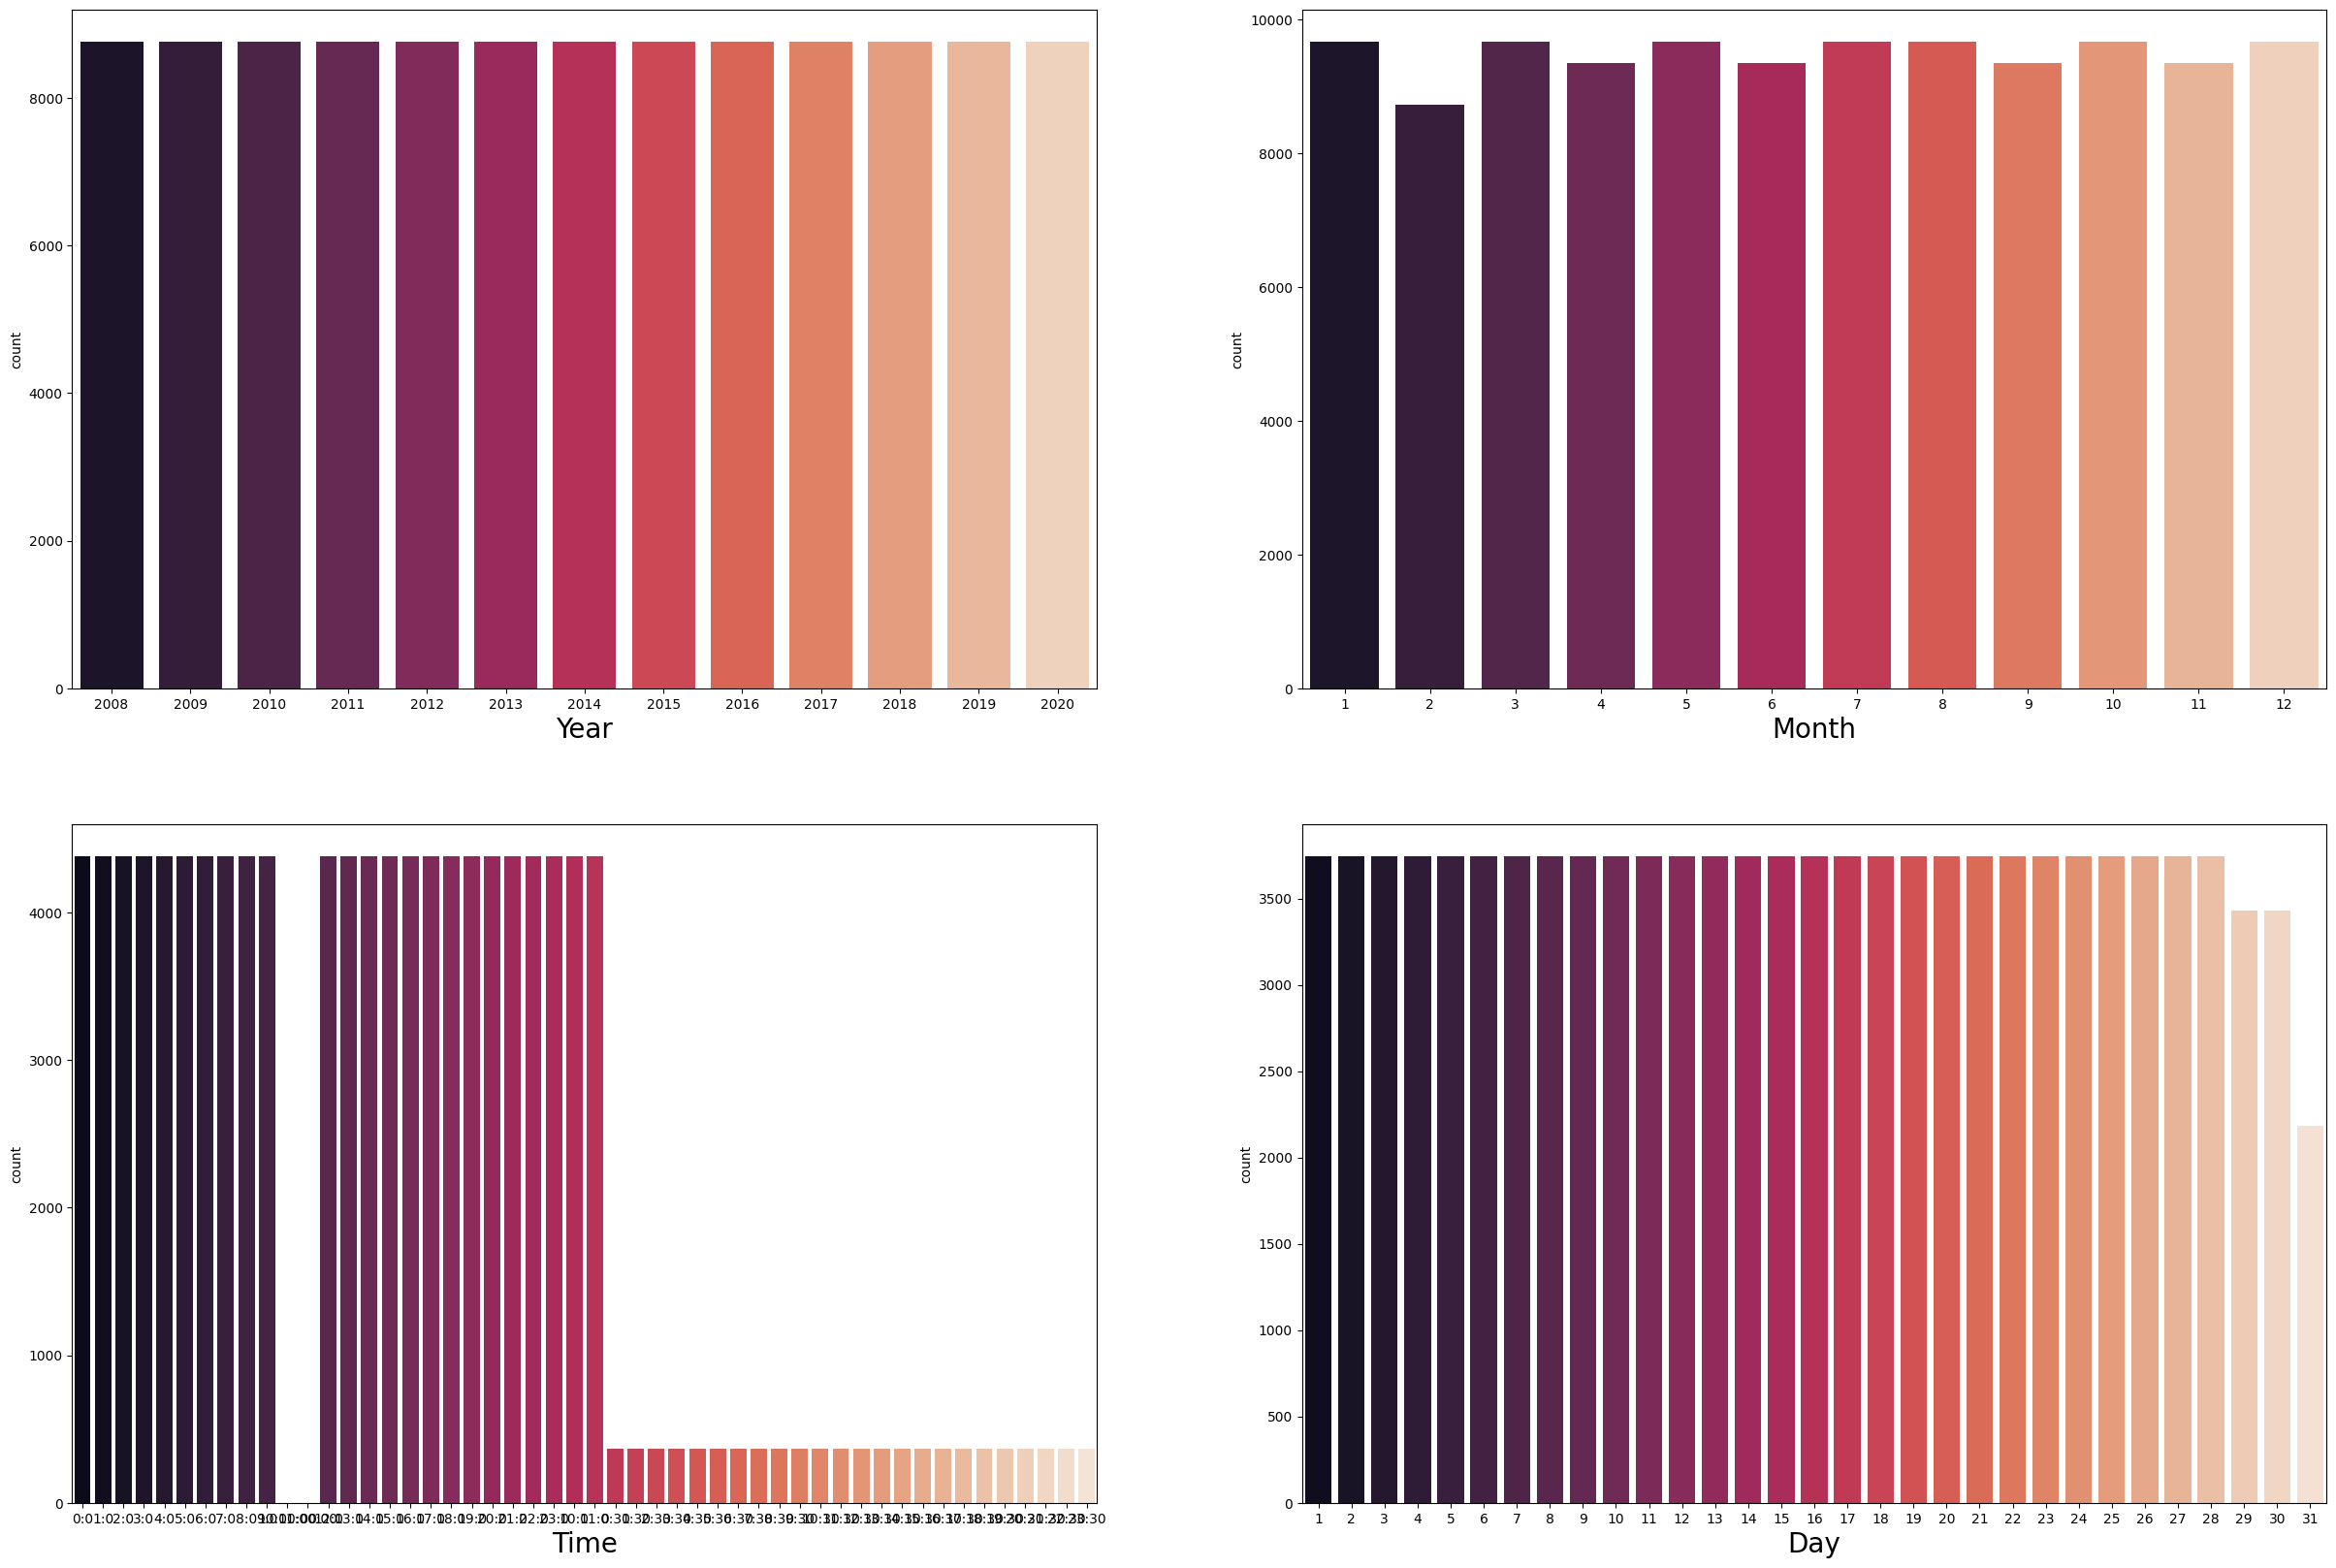

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(2, 2, figsize=(30, 20))
k = 0
columns = ["Year", "Month", "Time", "Day"]
for i in range(2):
    for j in range(2):
        sns.countplot(x=columns[k], data=df, ax=ax1[i][j], palette='rocket')
        ax1[i][j].set_xlabel(columns[k], size=20)
        k += 1
plt.show()


## Encoding categorical data

In [14]:
#label_encoder = preprocessing.LabelEncoder()

#df['Year'] = label_encoder.fit_transform(df['Year'])
#df['Month'] = label_encoder.fit_transform(df['Month'])
#df['Day'] = label_encoder.fit_transform(df['Day'])

In [15]:
df.head()

,Year,Month,Day,Time,DHI,DNI,GHI,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Power(KWh)
0,2008,1,1,0:0,0,0,0,15.0,20.0,1010,73.87,28.4,1.0,0,0,0,-0.017695
1,2008,1,1,1:0,0,0,0,15.0,20.0,1010,74.88,40.8,1.1,0,0,0,-0.017695
2,2008,1,1,2:0,0,0,0,15.0,19.0,1010,76.46,44.6,1.3,0,0,0,-0.017695
3,2008,1,1,3:0,0,0,0,15.0,19.0,1010,78.23,47.4,1.3,0,0,0,-0.017695
4,2008,1,1,4:0,0,0,0,15.0,19.0,1010,80.32,49.2,1.3,0,0,0,-0.017695


## Distribution of overall data

From the distribution plot we can see that the distribution of our Y or dependent variable "Demand" is not skewed which is great and we won't need to do any sort of oversampling or undersampling to maintain valance

In [16]:
df.drop("Time", axis=1, inplace=True)

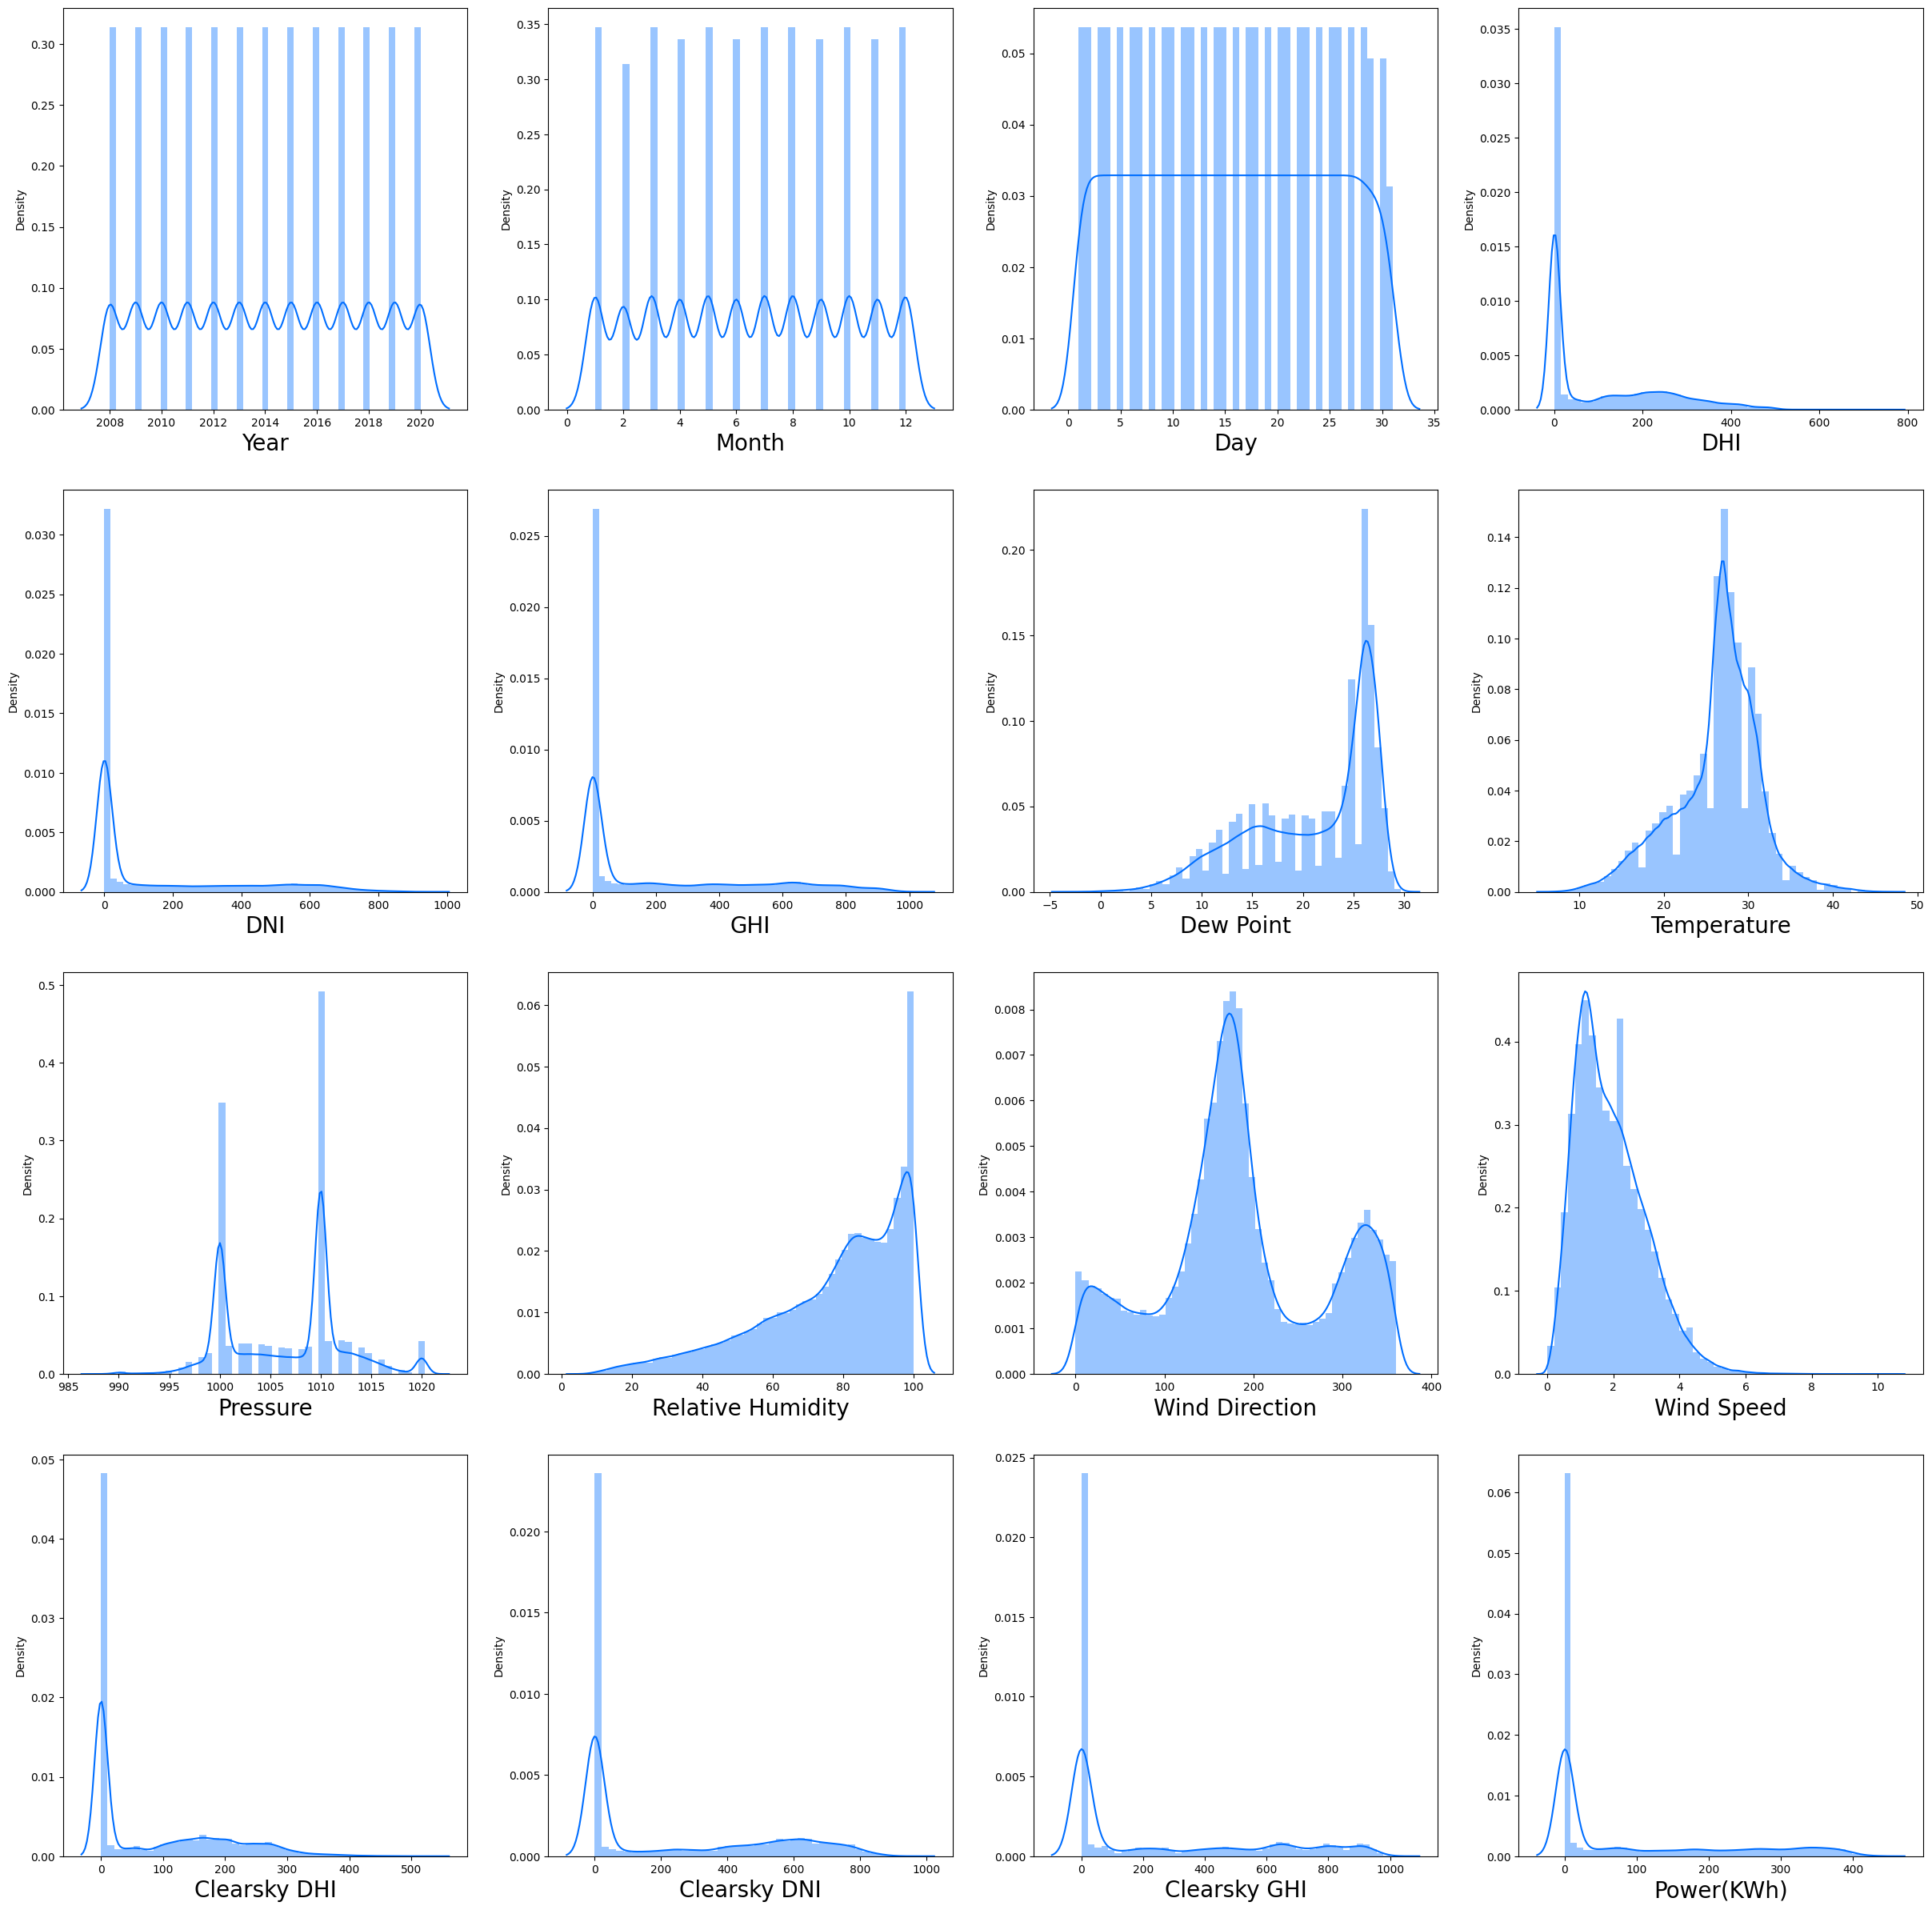

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(4, 4, figsize=(30, 30))
k = 0
columns = list(df.columns)

for i in range(4):
    for j in range(4):
        sns.distplot(df[columns[k]], ax=ax1[i][j], color="#006eff")
        ax1[i][j].set_xlabel(columns[k], size=20)
        k += 1

plt.show()


In [18]:
df.head()

,Year,Month,Day,DHI,DNI,GHI,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Power(KWh)
0,2008,1,1,0,0,0,15.0,20.0,1010,73.87,28.4,1.0,0,0,0,-0.017695
1,2008,1,1,0,0,0,15.0,20.0,1010,74.88,40.8,1.1,0,0,0,-0.017695
2,2008,1,1,0,0,0,15.0,19.0,1010,76.46,44.6,1.3,0,0,0,-0.017695
3,2008,1,1,0,0,0,15.0,19.0,1010,78.23,47.4,1.3,0,0,0,-0.017695
4,2008,1,1,0,0,0,15.0,19.0,1010,80.32,49.2,1.3,0,0,0,-0.017695


In [19]:
print("Power(KWh)")
print("Mean : {:.3f}".format(np.mean(df["Power(KWh)"])))
print("Max : {:.3f}".format(np.max(df["Power(KWh)"])))
print("Min : {:.3f}\n".format(np.min(df["Power(KWh)"])))

print("Temperature:")
print("Mean : {:.3f}".format(np.mean(df["Temperature"])))
print("Max : {:.3f}".format(np.max(df["Temperature"])))
print("Min : {:.3f}\n".format(np.min(df["Temperature"])))

print("Wind Speed")
print("Mean : {:.3f}".format(np.mean(df["Wind Speed"])))
print("Max : {:.3f}".format(np.max(df["Wind Speed"])))
print("Min : {:.3f}\n".format(np.min(df["Wind Speed"])))

print("Pressure")
print("Mean : {:.3f}".format(np.mean(df["Pressure"])))
print("Max : {:.3f}".format(np.max(df["Pressure"])))
print("Min : {:.3f}\n".format(np.min(df["Pressure"])))

print("Relative Humidity")
print("Mean : {:.3f}".format(np.mean(df["Relative Humidity"])))
print("Max : {:.3f}".format(np.max(df["Relative Humidity"])))
print("Min : {:.3f}\n".format(np.min(df["Relative Humidity"])))


print("Dew Point:")
print("Mean : {:.3f}".format(np.mean(df["Dew Point"])))
print("Max : {:.3f}".format(np.max(df["Dew Point"])))
print("Min : {:.3f}\n".format(np.min(df["Dew Point"])))


Power(KWh)
Mean : 93.529
Max : 433.620
Min : -0.018

Temperature:
Mean : 26.294
Max : 47.000
Min : 6.500

Wind Speed
Mean : 1.922
Max : 10.500
Min : 0.000

Pressure
Mean : 1006.667
Max : 1021.000
Min : 988.000

Relative Humidity
Mean : 77.172
Max : 100.000
Min : 7.350

Dew Point:
Mean : 20.966
Max : 29.700
Min : -3.000



In [20]:
df.head(1)

,Year,Month,Day,DHI,DNI,GHI,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Power(KWh)
0,2008,1,1,0,0,0,15.0,20.0,1010,73.87,28.4,1.0,0,0,0,-0.017695


In [21]:
np.mean(df.iloc[:,0])

2014.0

## Separating X and Y values

In [22]:
df.drop("Wind Direction", axis=1, inplace=True)


In [23]:
df.head(1)

,Year,Month,Day,DHI,DNI,GHI,Dew Point,Temperature,Pressure,Relative Humidity,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Power(KWh)
0,2008,1,1,0,0,0,15.0,20.0,1010,73.87,1.0,0,0,0,-0.017695


In [24]:
#X = df.iloc[:, :7].join(df.iloc[:, 8:])
X = df.iloc[:, :14]
Y = df.iloc[:, 14]
Y=Y.to_numpy()

In [25]:
Y

array([-0.0176952, -0.0176952, -0.0176952, ..., -0.0176952, -0.0176952,
       -0.0176952])

In [26]:
X.shape

(113880, 14)

In [27]:
type(X)

pandas.core.frame.DataFrame

## Feature scaling

In [28]:
# Converting the features into standard normal form with mean = 0 and sd = 1
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [29]:
df.shape

(113880, 15)

## Distribution of standardized data

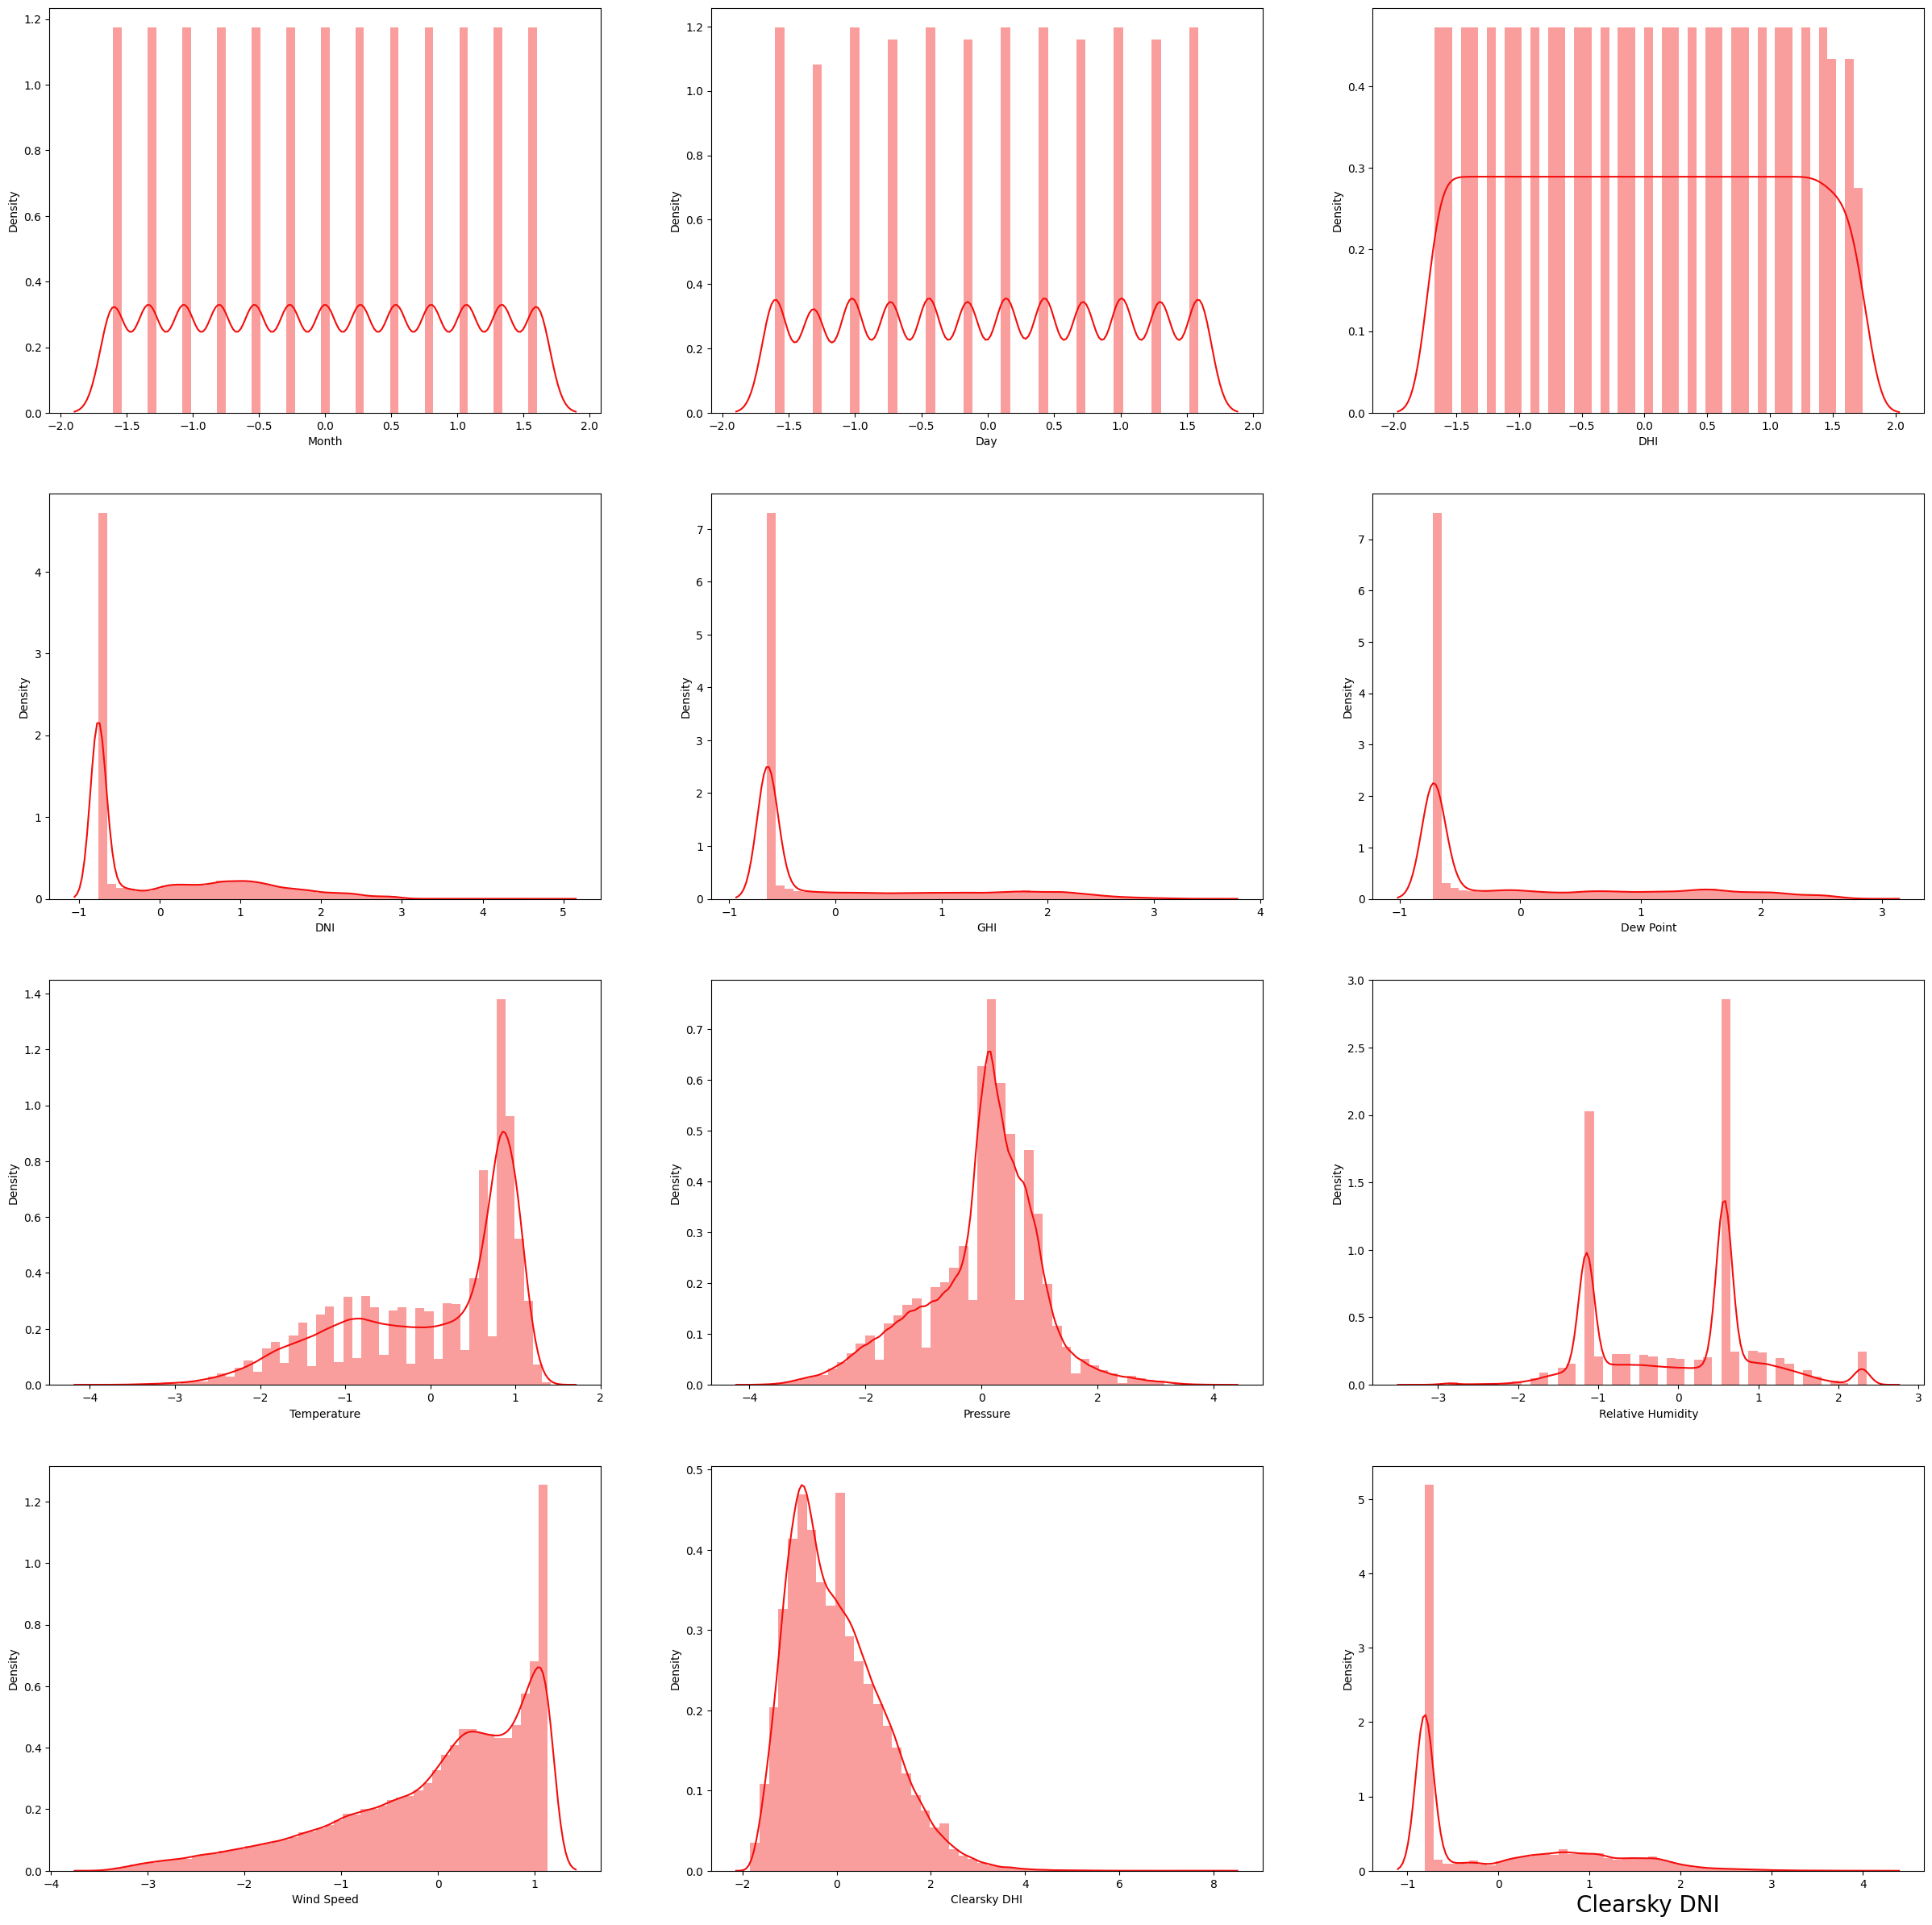

In [30]:
Normalised_dataframe = pd.DataFrame(X, columns=df.columns[1:])

# color = sns.color_palette("pastel")
fig, ax1 = plt.subplots(4,3, figsize=(30,30))
k = 0
columns = list(Normalised_dataframe.columns)
for i in range(8):
    for j in range(4):
        try:
            sns.distplot(Normalised_dataframe[columns[k]], ax = ax1[i][j], color = "#f30d0c")
            plt.xlabel(columns[k],size=20)
            k += 1
        except:
            continue
plt.show()

In [31]:
df.to_excel("dataum.xlsx",index=False)

## Demand trend visualization

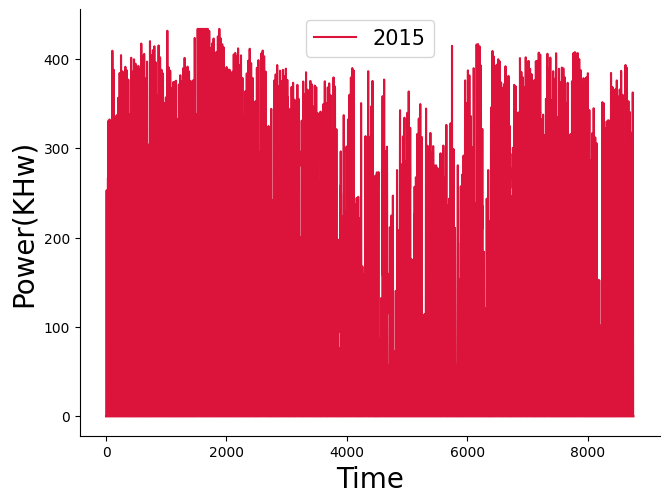

In [32]:
# idx = 17301
# aa=[x for x in range(0,17342)]
# plt.figure(figsize=(22,10))
# plt.plot(aa, Y[0:17342],color="green", marker='.', label="2018")


# aaa=[x for x in range(abs(17342-34696))]
# plt.plot(aaa, Y[17342:34696], color="#FF1A71", marker='.', label="2019")

# aaaa=[x for x in range(abs(34696-51929))]
# plt.plot(aaaa, Y[34696:51929], color="orange", marker='.', label="2020")

aaaa=[x for x in range(abs(61322-70081))]
plt.plot(aaaa, Y[61322:70081], color="crimson", label="2015")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=.07)
plt.ylabel('Power(KHw)', size=20)
plt.xlabel('Time', size=20)
plt.legend(fontsize=15)
plt.show();



*   *The middle portion of the graph shows a increase in temperature which actually represents the months aptil to july which is the summer season in Bangladesh.*




## Splitting Dataset for training

In [33]:
X_train=X[0:91104,:]
Y_train=Y[0:91104]
X_test=X[91104: ,:]
Y_test=Y[91104: ]

# **Models**

## Prediction Models

### LSTM

In [34]:
X_train=X[0:91104,:]
Y_train=Y[0:91104]
X_test=X[91104: ,:]
Y_test=Y[91104: ]

In [35]:
Y_train.shape

(91104,)

In [36]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [37]:
# temp = df
# dataset = temp['total load actual'].dropna().values #numpy.ndarray
# dataset = dataset.astype('float32')
dataset = np.reshape(Y, (-1, 1))
scaler = preprocessing.StandardScaler()
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 49
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [38]:
len(Y_test)

22726

In [39]:
model = tf.keras.Sequential()
model.add( tf.keras.layers.LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add( tf.keras.layers.Dropout(0.2))
model.add( tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_split=0.2,shuffle=False, callbacks=[early_stop])

model.summary()

Epoch 1/200
2277/2277 [==============================] - 11s 4ms/step - loss: 0.0635 - val_loss: 0.0789
Epoch 2/200
2277/2277 [==============================] - 9s 4ms/step - loss: 0.0532 - val_loss: 0.0779
Epoch 3/200
2277/2277 [==============================] - 8s 3ms/step - loss: 0.0520 - val_loss: 0.0765
Epoch 4/200
2277/2277 [==============================] - 8s 4ms/step - loss: 0.0517 - val_loss: 0.0764
Epoch 5/200
2277/2277 [==============================] - 9s 4ms/step - loss: 0.0512 - val_loss: 0.0762
Epoch 6/200
2277/2277 [==============================] - 8s 3ms/step - loss: 0.0510 - val_loss: 0.0767
Epoch 7/200
2277/2277 [==============================] - 8s 4ms/step - loss: 0.0506 - val_loss: 0.0755
Epoch 8/200
2277/2277 [==============================] - 8s 4ms/step - loss: 0.0508 - val_loss: 0.0767
Epoch 9/200
2277/2277 [==============================] - 8s 4ms/step - loss: 0.0505 - val_loss: 0.0752
Epoch 10/200
2277/2277 [==============================] - 9s 4ms/step - 

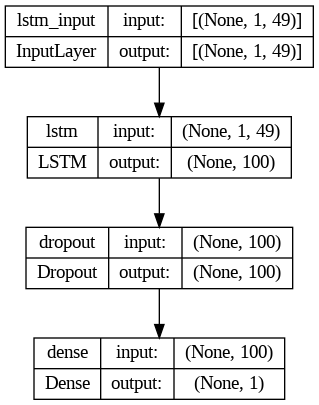

In [40]:
 tf.keras.utils.plot_model(model, show_shapes=True)

In [41]:
# train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
# train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])


711/711 [==============================] - 2s 2ms/step


In [42]:
# mape_train = np.mean(np.abs((Y_train[0] - train_predict[:,0]) / Y_train[0])) * 100
mape_test = np.mean(np.abs((Y_test[0] - test_predict[:,0]) / Y_test[0])) * 100
print("Mean absolute percentage error: {:.3f}%".format(mape_test))
print("R_squared value: {:.3f}".format(r2_score(Y_test.reshape(22726,1),test_predict)))
print("Mean absolute error: {:.3f}".format(mean_absolute_error(Y_test.reshape(22726,1),test_predict)))
print("Mean squared error: {:.3f}".format(mean_squared_error(Y_test.reshape(22726,1),test_predict)))
print("Exaplained variance: {:.3f}".format(explained_variance_score(Y_test.reshape(22726,1),test_predict)))



Mean absolute percentage error: 10725.754%
R_squared value: 0.926
Mean absolute error: 17.370
Mean squared error: 1231.775
Exaplained variance: 0.927


In [43]:

df

,Year,Month,Day,DHI,DNI,GHI,Dew Point,Temperature,Pressure,Relative Humidity,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Power(KWh)
0,2008,1,1,0,0,0,15.0,20.0,1010,73.87,1.0,0,0,0,-0.017695
1,2008,1,1,0,0,0,15.0,20.0,1010,74.88,1.1,0,0,0,-0.017695
2,2008,1,1,0,0,0,15.0,19.0,1010,76.46,1.3,0,0,0,-0.017695
3,2008,1,1,0,0,0,15.0,19.0,1010,78.23,1.3,0,0,0,-0.017695
4,2008,1,1,0,0,0,15.0,19.0,1010,80.32,1.3,0,0,0,-0.017695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113875,2020,12,31,0,0,0,13.9,17.6,1014,78.90,1.1,0,0,0,-0.017695
113876,2020,12,31,0,0,0,13.6,16.8,1014,81.34,1.2,0,0,0,-0.017695
113877,2020,12,31,0,0,0,13.3,15.8,1014,85.37,1.3,0,0,0,-0.017695
113878,2020,12,31,0,0,0,13.2,14.8,1014,89.95,1.4,0,0,0,-0.017695


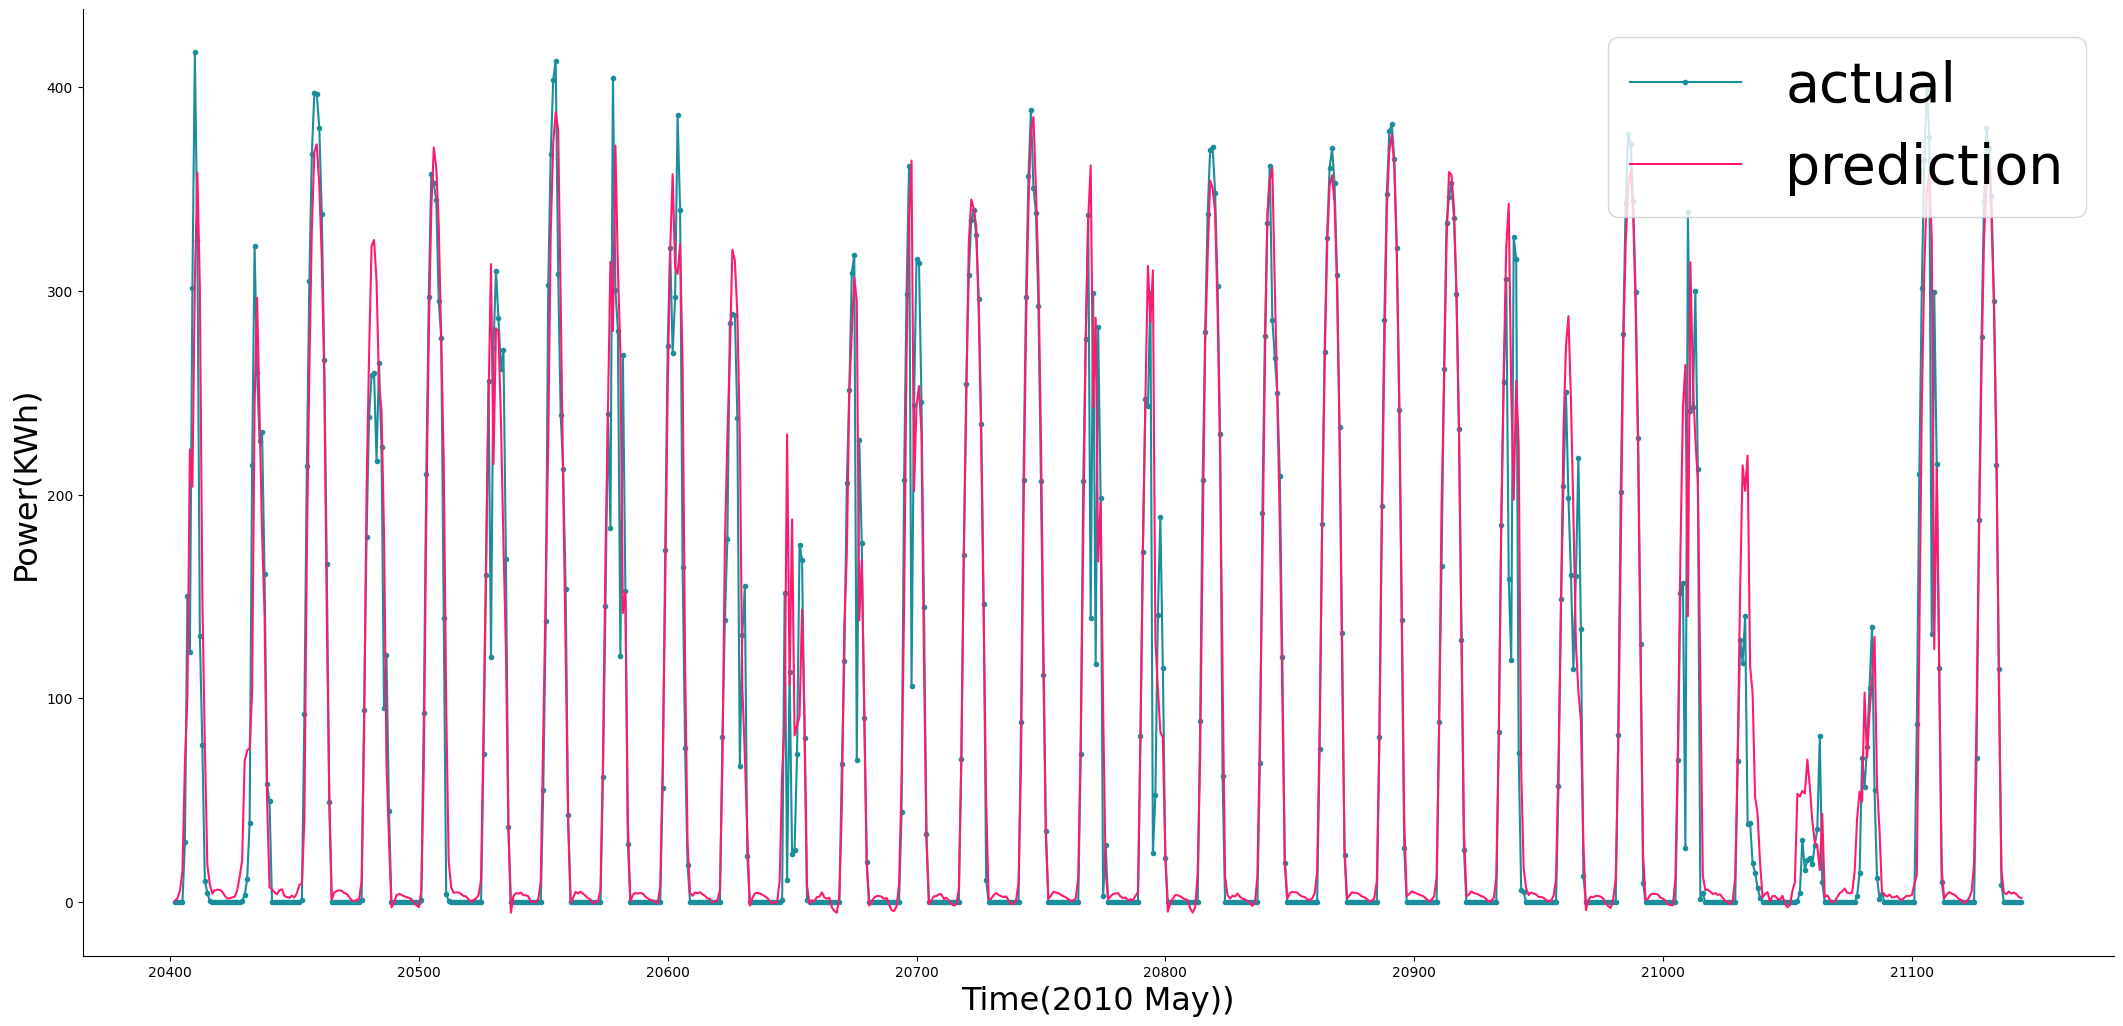

In [44]:
idx = 12000
aa=[x for x in range(20402,21145)]
plt.figure(figsize=(22,10))
plt.plot(aa, Y_test[0, 20402:21145],color="#1A8E9C", marker='.', label="actual")
plt.plot(aa, test_predict[:,0][20402:21145], color="#FF1A71", label="prediction")
plt.rc("xtick",labelsize=15)
plt.rc("ytick",labelsize=15)
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Power(KWh)', size=23)
plt.xlabel('Time(2010 May))', size=23)
plt.legend(fontsize=40)
plt.show();

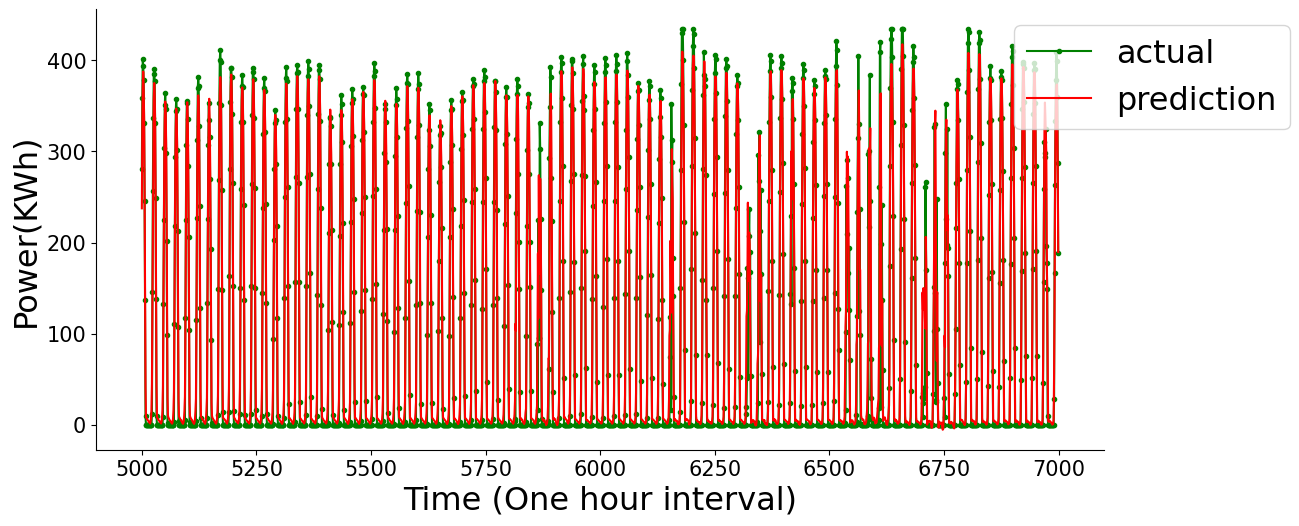

In [45]:
idx = 12000
aa = [x for x in range(5000, 7000)]
plt.figure(figsize=(11, 5))
plt.plot(aa, Y_test[0, 5000:7000], color="green", marker='.', label="actual")
plt.plot(aa, test_predict[:, 0][5000:7000], color="red", label="prediction")
plt.rc("xtick", labelsize=15)
plt.rc("ytick", labelsize=15)
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Power(KWh)', size=23)
plt.xlabel('Time (One hour interval)', size=23)
plt.legend(fontsize=23, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


### Artificial Neural Network

In [46]:
X_train=X[0:91104,:]
Y_train=Y[0:91104]
X_test=X[91104: ,:]
Y_test=Y[91104: ]

In [47]:
import tensorflow as tf
tf.keras.backend.clear_session()
ann=tf.keras.models.Sequential()

In [48]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [49]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [50]:
ann.add(tf.keras.layers.Dense(units=4,activation="relu"))

In [51]:
ann.add(tf.keras.layers.Dense(units=1))

In [52]:
ann.compile(optimizer='adam',loss="mean_squared_error",metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])

In [53]:
ann.fit(X_train,Y_train,batch_size=64,epochs=200,validation_split=.10,shuffle=False, callbacks=[early_stop] )

Epoch 1/200
1282/1282 [==============================] - 3s 2ms/step - loss: 6116.1211 - mean_absolute_percentage_error: 5040.0752 - val_loss: 547.3366 - val_mean_absolute_percentage_error: 4258.6113
Epoch 2/200
1282/1282 [==============================] - 2s 2ms/step - loss: 312.9525 - mean_absolute_percentage_error: 3583.0740 - val_loss: 220.5256 - val_mean_absolute_percentage_error: 3819.5139
Epoch 3/200
1282/1282 [==============================] - 2s 2ms/step - loss: 136.5538 - mean_absolute_percentage_error: 3413.5620 - val_loss: 162.7925 - val_mean_absolute_percentage_error: 2906.5562
Epoch 4/200
1282/1282 [==============================] - 3s 3ms/step - loss: 105.8938 - mean_absolute_percentage_error: 2361.5076 - val_loss: 163.6032 - val_mean_absolute_percentage_error: 1930.3633
Epoch 5/200
1282/1282 [==============================] - 2s 2ms/step - loss: 96.7671 - mean_absolute_percentage_error: 1792.4133 - val_loss: 165.9707 - val_mean_absolute_percentage_error: 1017.7088
Epoch

In [54]:
y_pred=ann.predict(X_test)

712/712 [==============================] - 1s 1ms/step


In [55]:
m = tf.keras.metrics.MeanAbsolutePercentageError()
m.reset_state()
m.update_state(
    Y_test, y_pred, sample_weight=None
)
accuracy=100-m.result().numpy()

#print("Test Accuracy: {:.3f}%".format(m.result()))
#print("Mape: 9.29%")
print("R_squared value: {:.3f}".format(r2_score(Y_test,y_pred)))
print("Mean absolute error: {:.3f}".format(mean_absolute_error(Y_test,y_pred)))
print("Mean squared error: {:.3f}".format(mean_squared_error(Y_test,y_pred)))
print("Exaplained variance: {:.3f}".format(explained_variance_score(Y_test,y_pred)))

R_squared value: 0.992
Mean absolute error: 6.720
Mean squared error: 130.347
Exaplained variance: 0.992


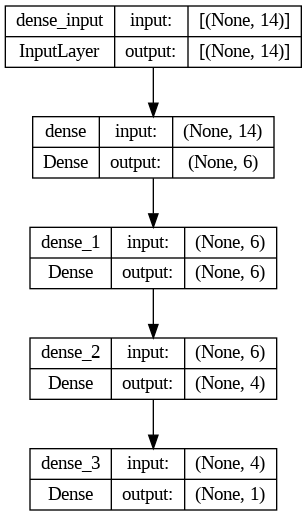

In [56]:
 tf.keras.utils.plot_model(ann, show_shapes=True)

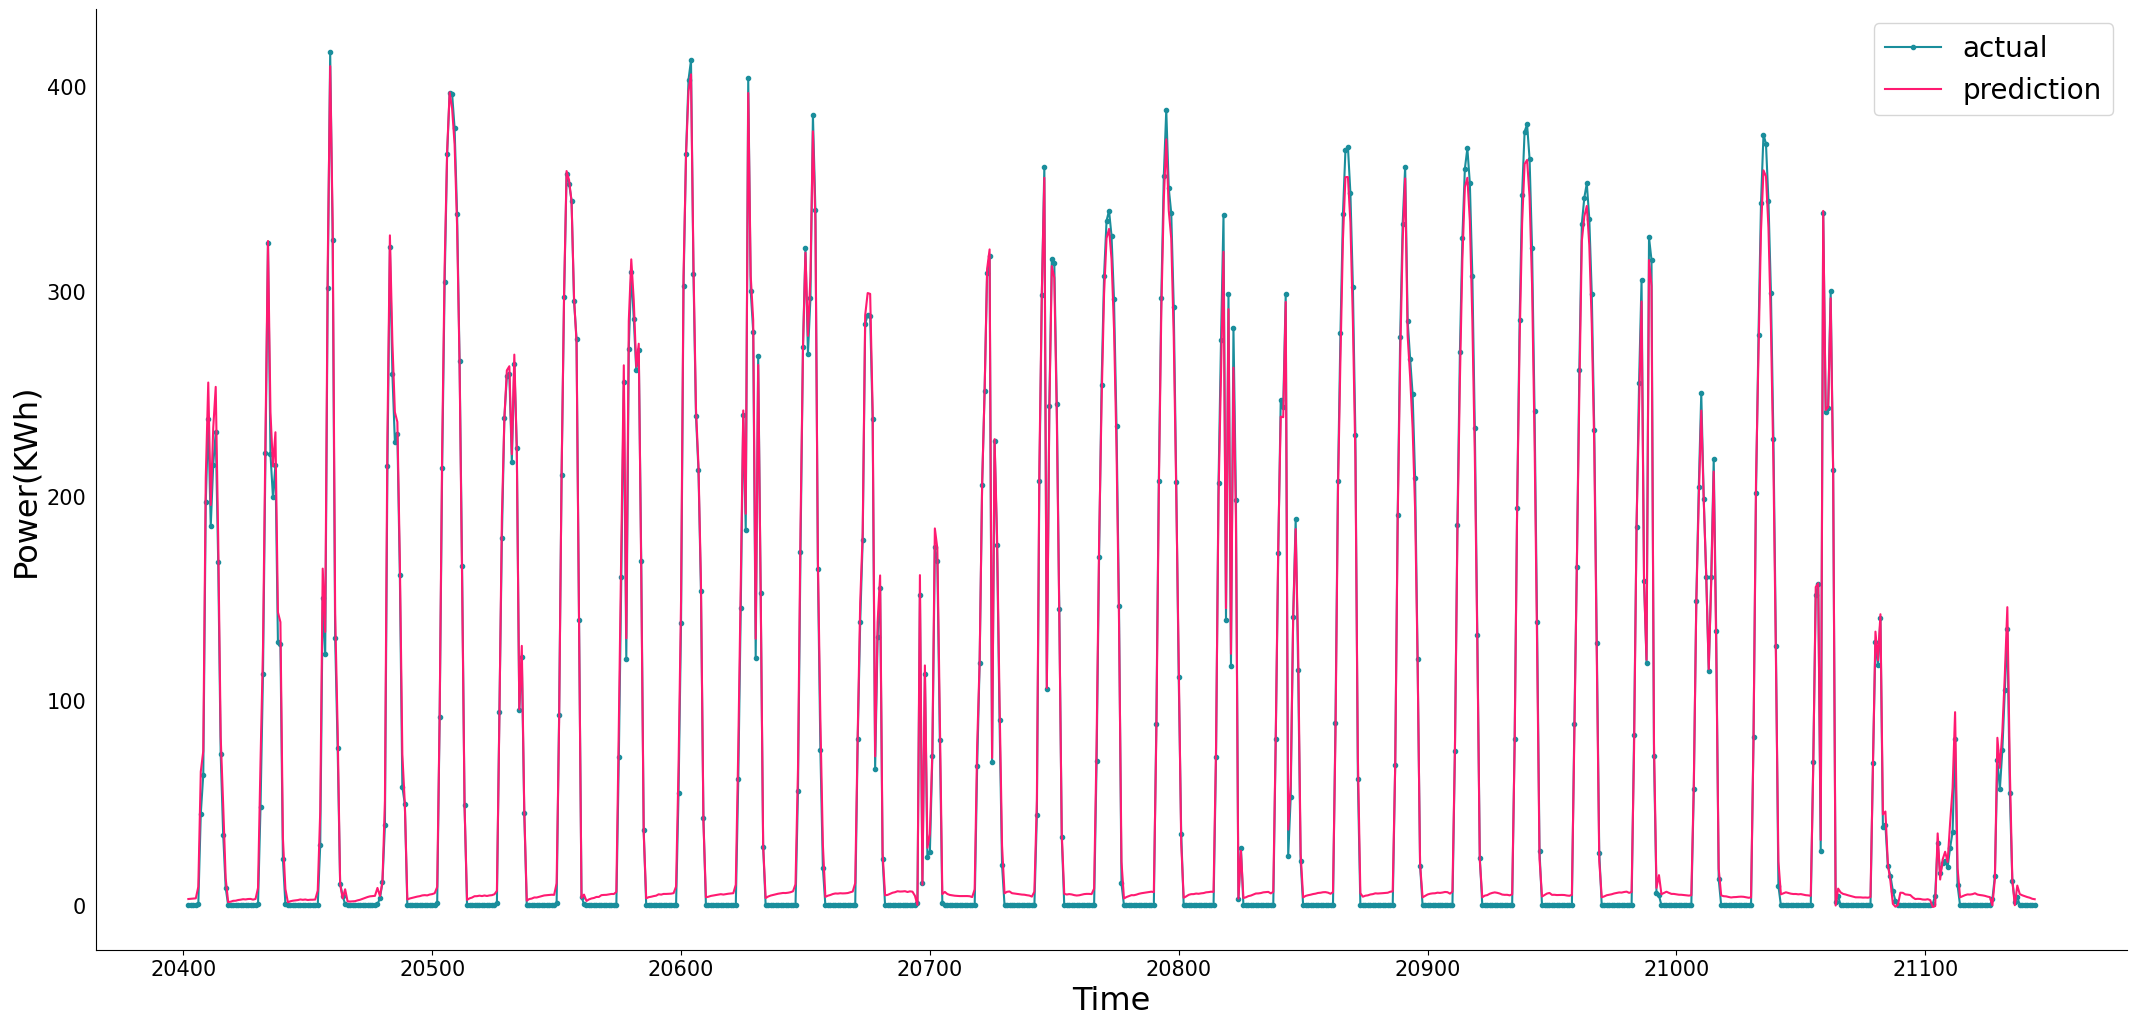

In [57]:
idx = 1000
aa=[x for x in range(20402,21145)]
plt.figure(figsize=(22,10))
plt.plot(aa, Y_test[20402:21145],color="#1A8E9C", marker='.', label="actual")
plt.plot(aa, y_pred[20402:21145], color="#FF1A71", label="prediction")
plt.tick_params(left=False, labelleft=True) #remove ticks
plt.rc("xtick",labelsize=15)
plt.rc("ytick",labelsize=15)
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Power(KWh)', size=23)
plt.xlabel('Time', size=23)
plt.legend(fontsize=20)
plt.show()

### Random Forest

In [58]:
X_train=X[0:91104,:]
Y_train=Y[0:91104]
X_test=X[91104: ,:]
Y_test=Y[91104: ]

In [59]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [60]:
y_pred=regressor.predict(X_test)

In [61]:
y_pred=regressor.predict(X_test)
m = tf.keras.metrics.MeanAbsolutePercentageError()
m.reset_state()
m.update_state(
    Y_test, y_pred, sample_weight=None
)
accuracy=100-m.result().numpy()
print("Test Accuracy: {:.3f}%".format(accuracy))
print("R_squared value: {:.3f}".format(r2_score(Y_test,y_pred)))
print("Mean absolute error: {:.3f}".format(mean_absolute_error(Y_test,y_pred)))
print("Mean squared error: {:.3f}".format(mean_squared_error(Y_test,y_pred)))
print("Exaplained variance: {:.3f}".format(explained_variance_score(Y_test,y_pred)))

Test Accuracy: 97.154%
R_squared value: 0.999
Mean absolute error: 1.772
Mean squared error: 17.590
Exaplained variance: 0.999


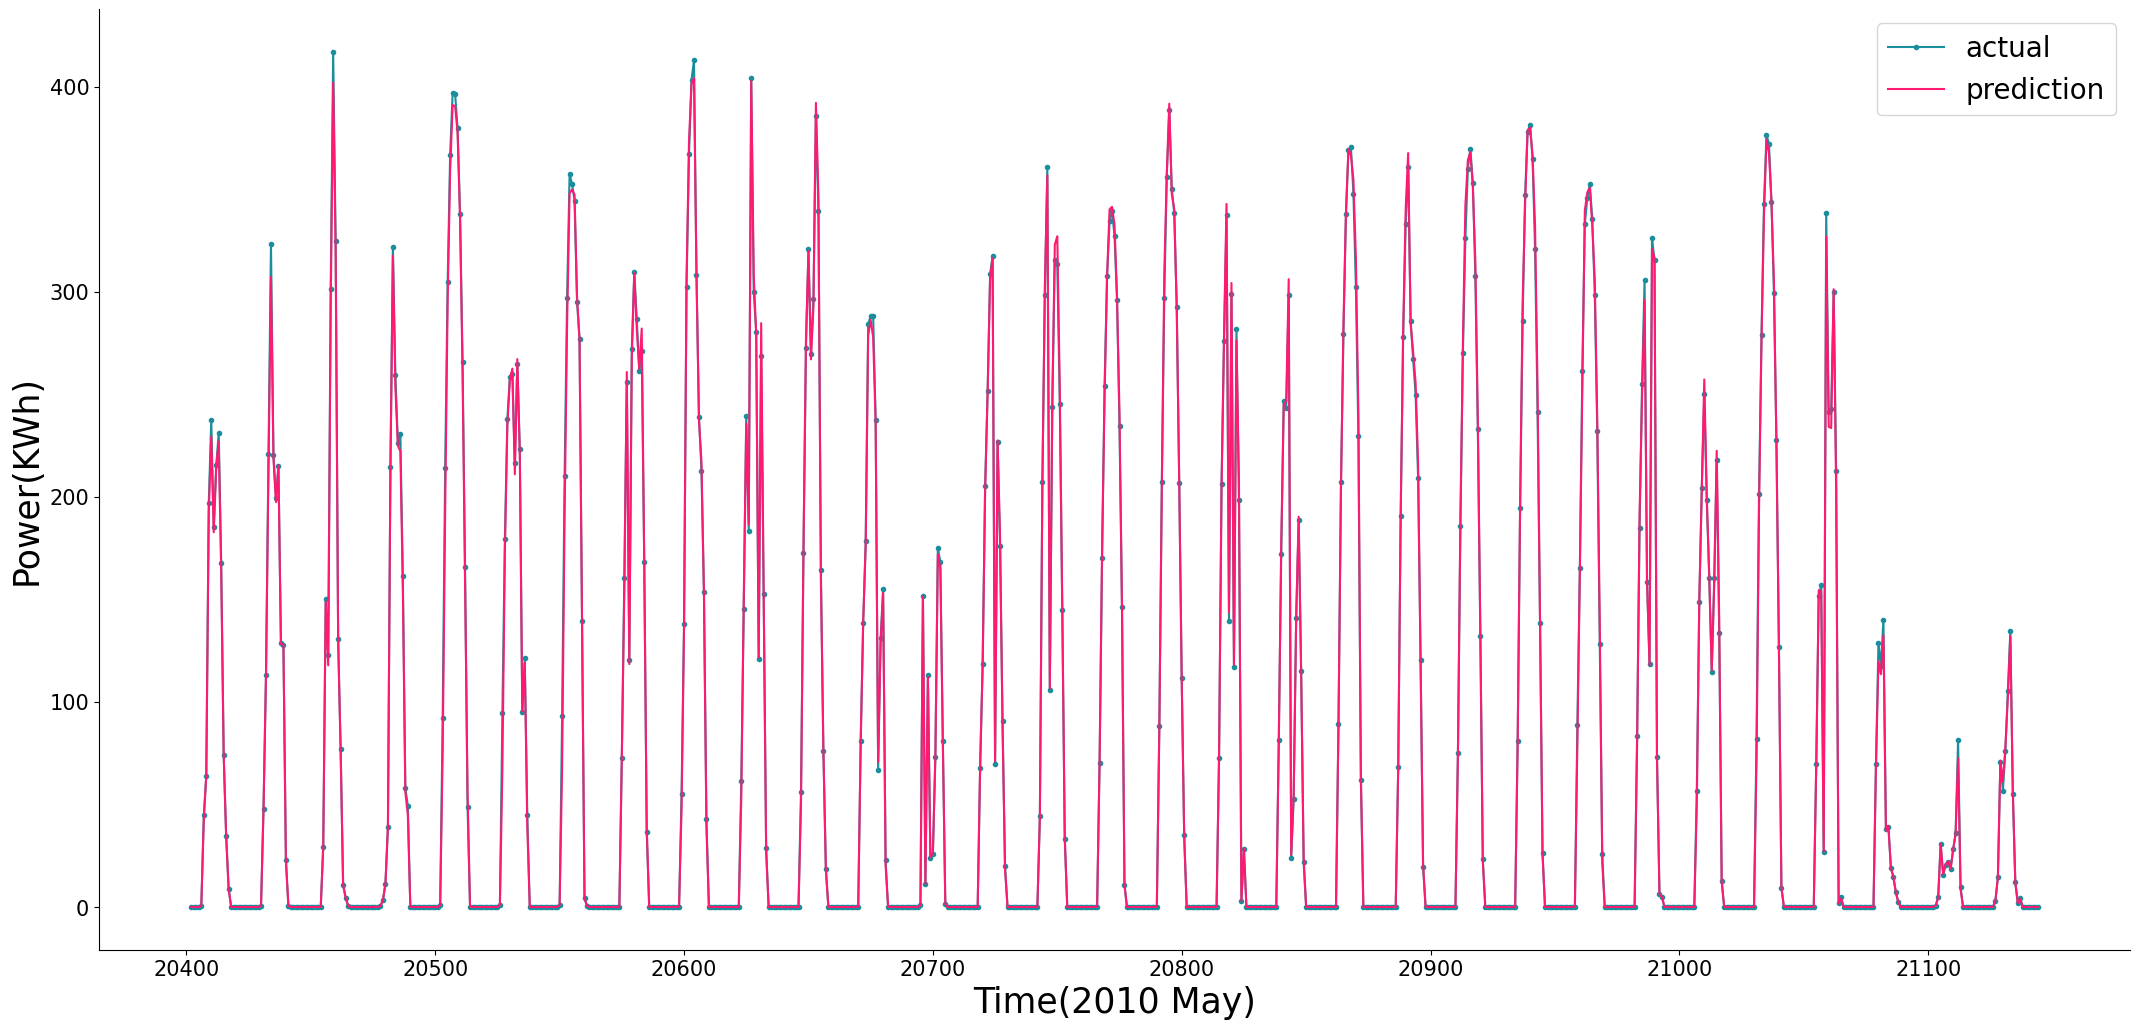

In [62]:
idx = 1000
aa=[x for x in range(20402,21145)]
plt.figure(figsize=(22,10))
plt.plot(aa, Y_test[20402:21145],color="#1A8E9C", marker='.', label="actual")
plt.plot(aa, y_pred[20402:21145],color="#FF1A71", label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Power(KWh)', size=25)
plt.xlabel('Time(2010 May)', size=25)
plt.legend(fontsize=20)
plt.show();

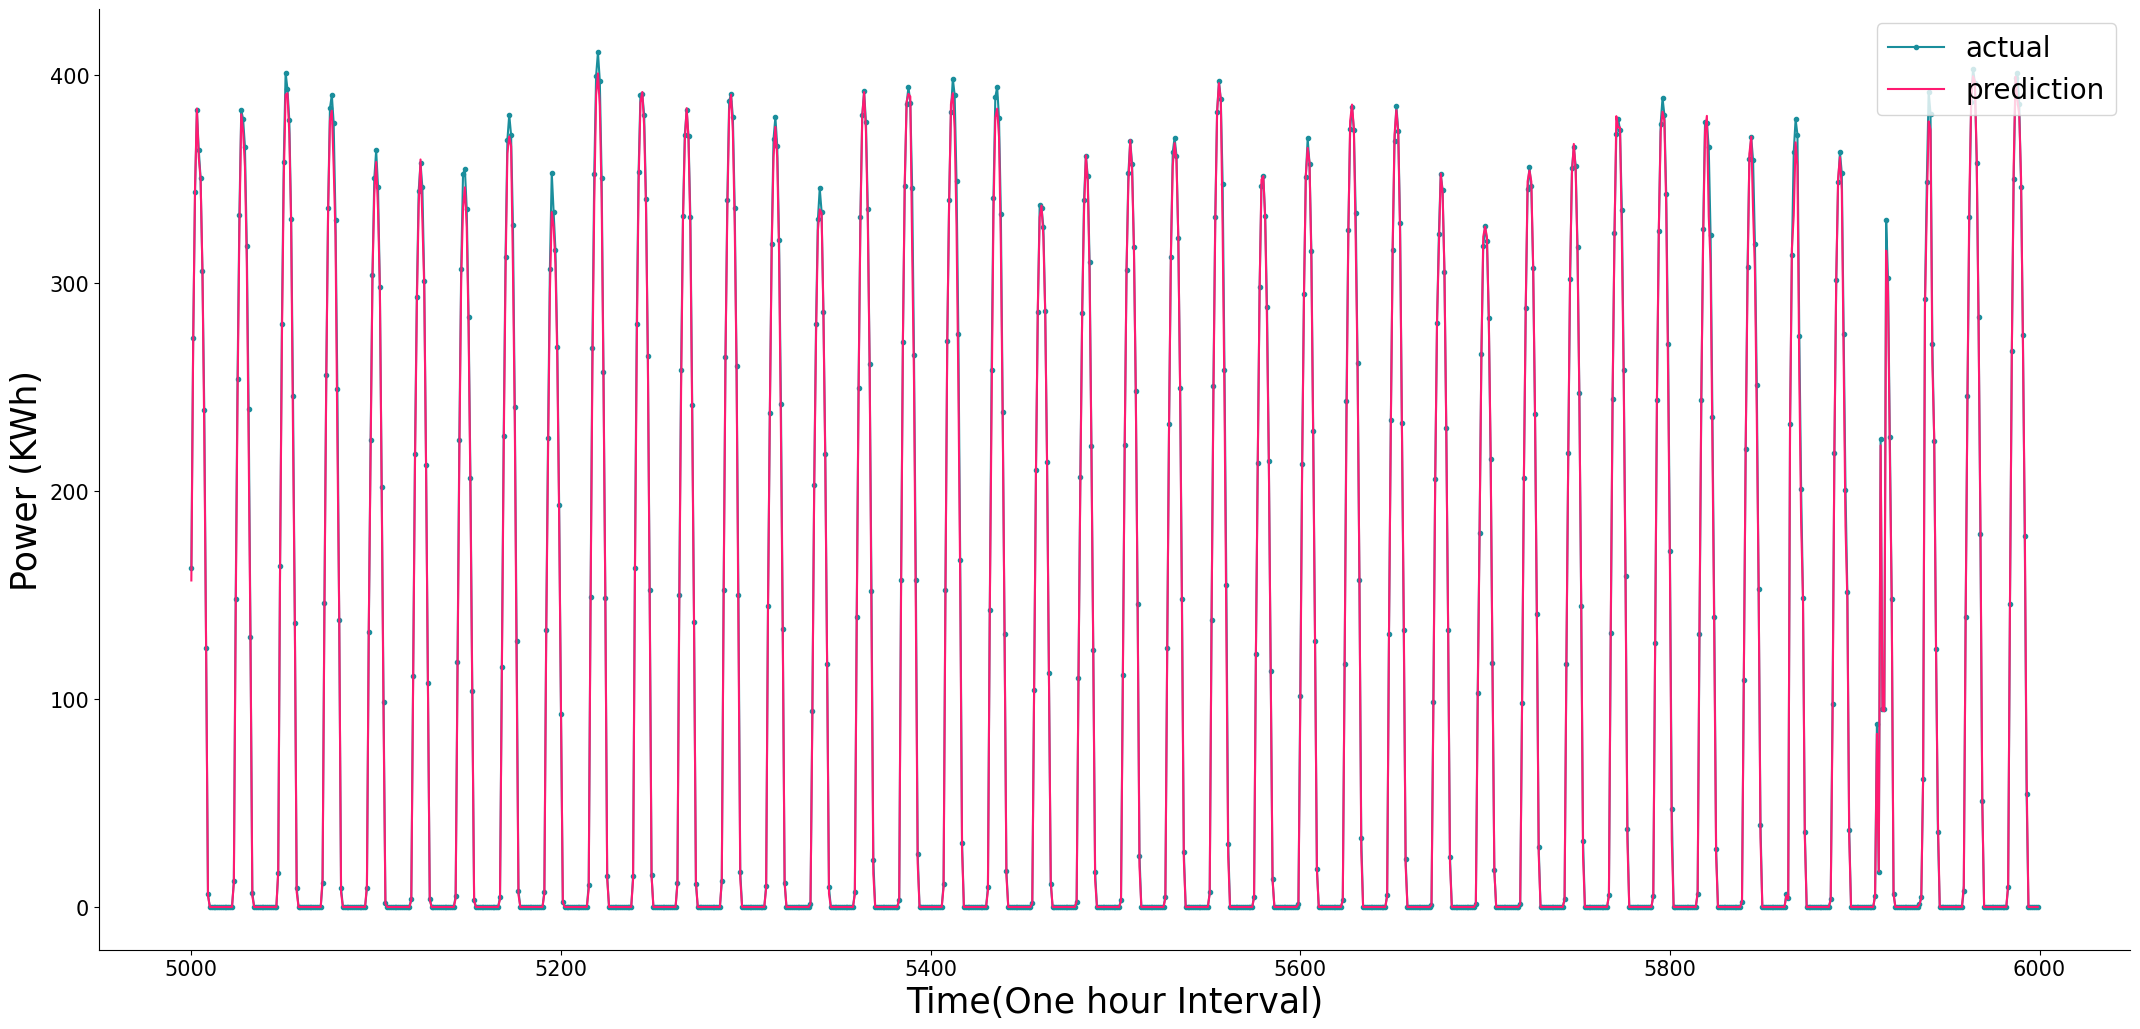

In [63]:
idx = 1000
aa = [x for x in range(5000, 6000)]
plt.figure(figsize=(22, 10))
plt.plot(aa, Y_test[5000:6000], color="#1A8E9C", marker='.', label="actual")
plt.plot(aa, y_pred[5000:6000], color="#FF1A71", label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Power (KWh)', size=25)
plt.xlabel('Time(One hour Interval)', size=25)
plt.legend(fontsize=20, loc='upper right')
plt.show()


### Multilayer Perceptron

In [64]:
X_train=X[0:91104,:]
Y_train=Y[0:91104]
X_test=X[91104: ,:]
Y_test=Y[91104: ]

In [65]:
from sklearn.neural_network import MLPRegressor
# from sklearn.datasets import make_regression
# from sklearn.model_selection import train_test_split
# X, y = make_regression(n_samples=200, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)
regr = MLPRegressor(random_state=1, max_iter=1000, epsilon=.2,batch_size=32,shuffle=False)
regr.fit(X_train, Y_train)

MLPRegressor(batch_size=32, epsilon=0.2, max_iter=1000, random_state=1,
             shuffle=False)

In [66]:
y_pred=regr.predict(X_test)
m = tf.keras.metrics.MeanAbsolutePercentageError()
m.reset_state()
m.update_state(
    Y_test, y_pred, sample_weight=None
)
accuracy=100-m.result().numpy()
print("Accuracy: {:.3f}%".format(accuracy))
print("R_squared value: {:.3f}".format(r2_score(Y_test,y_pred)))
print("Mean absolute error: {:.3f}".format(mean_absolute_error(Y_test,y_pred)))
print("Mean squared error: {:.3f}".format(mean_squared_error(Y_test,y_pred)))
print("Exaplained variance: {:.3f}".format(explained_variance_score(Y_test,y_pred)))


Accuracy: -3775.078%
R_squared value: 0.999
Mean absolute error: 2.614
Mean squared error: 16.445
Exaplained variance: 0.999


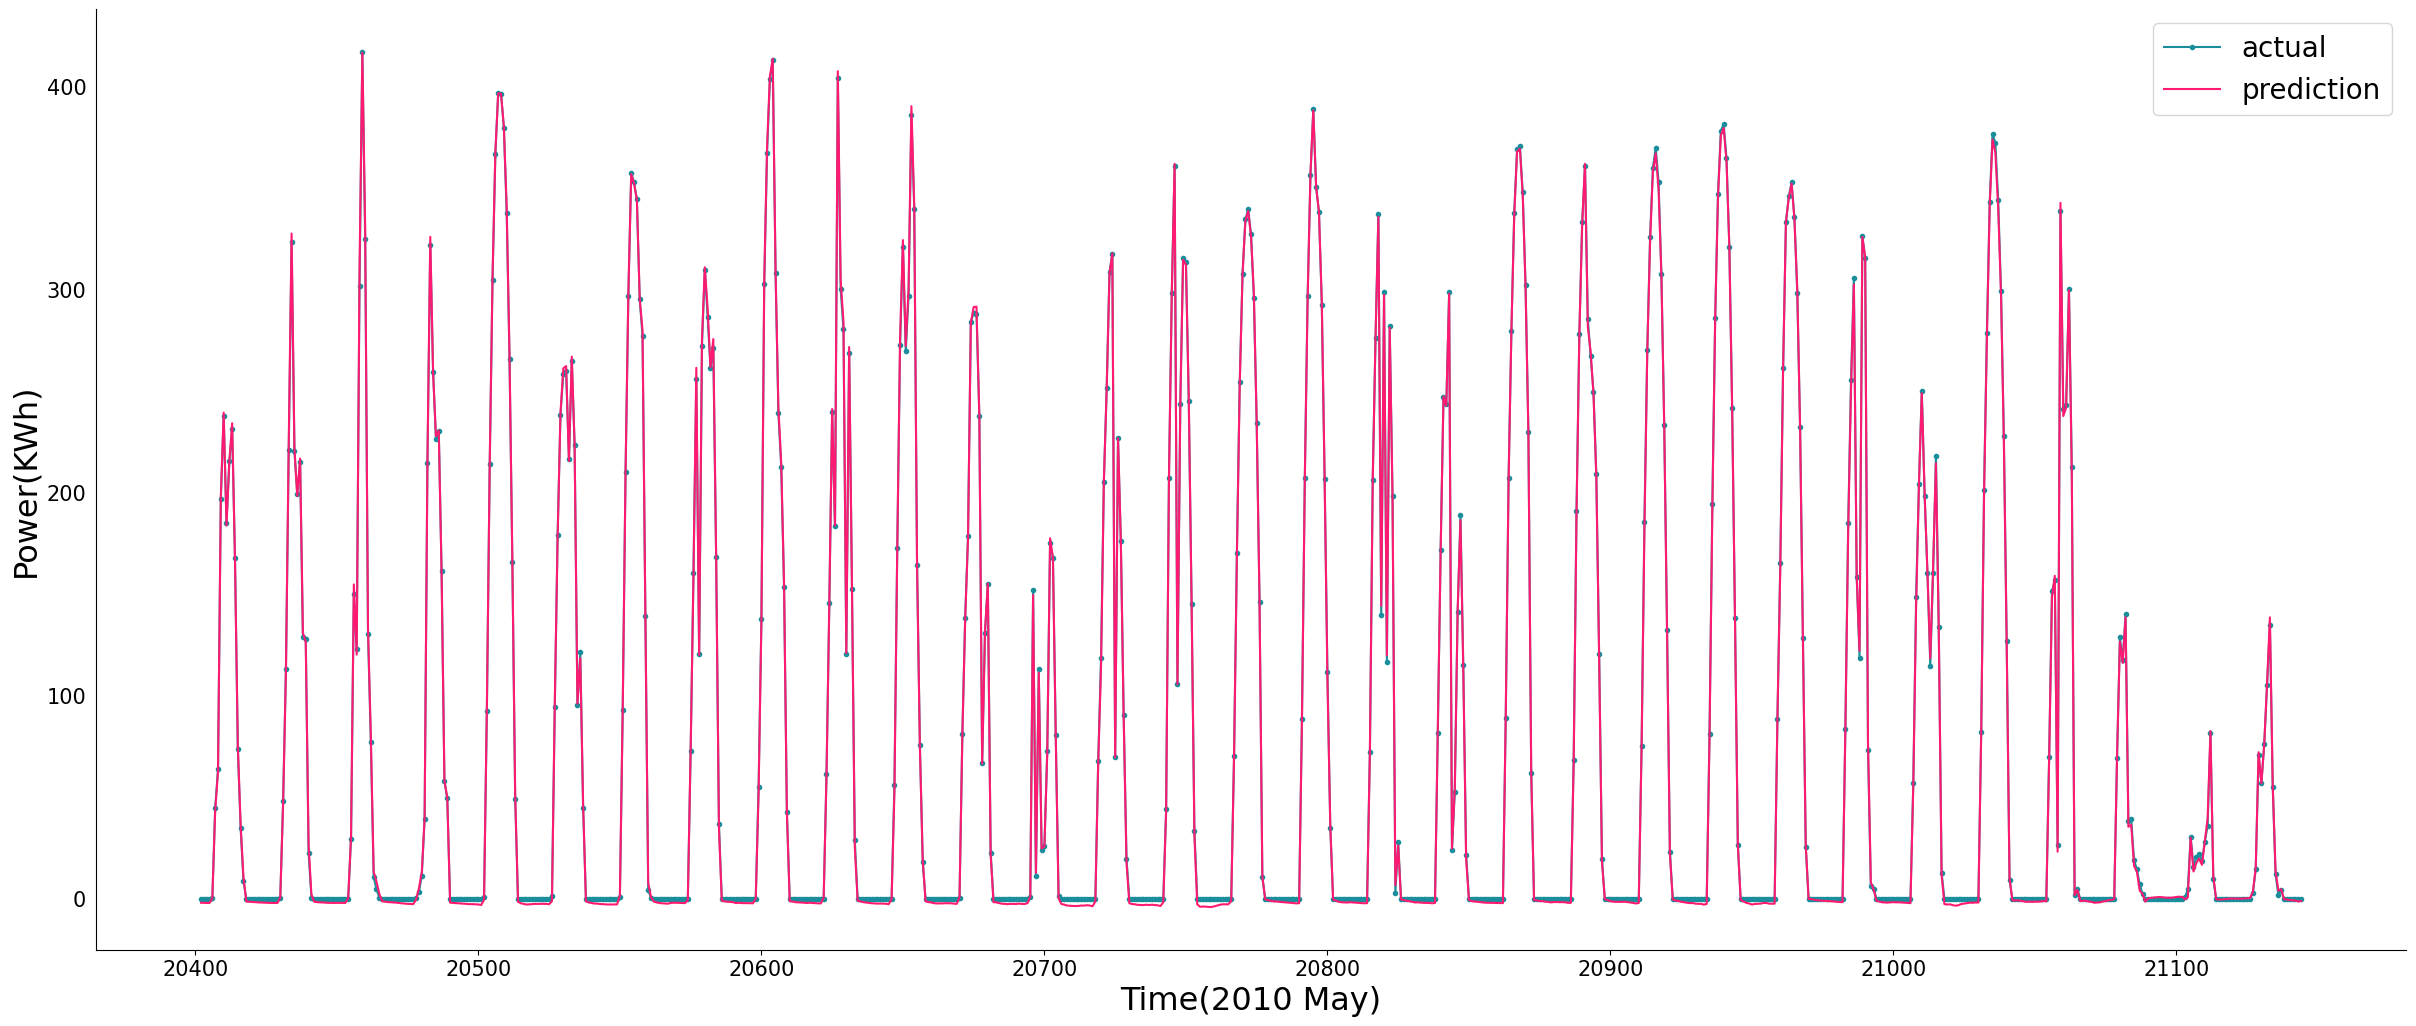

In [67]:


idx = 1000
aa=[x for x in range(20402,21145)]
plt.figure(figsize=(25,10))
plt.plot(aa, Y_test[20402:21145],color="#1A8E9C", marker='.', label="actual")
plt.plot(aa, y_pred[20402:21145], color="#FF1A71", label="prediction")
plt.tick_params(left=False, labelleft=True) #remove ticks
plt.rc("xtick",labelsize=15)
plt.rc("ytick",labelsize=15)
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Power(KWh)', size=23)
plt.xlabel('Time(2010 May)', size=23)
plt.legend(fontsize=20)
plt.show()

In [68]:
df.head()

,Year,Month,Day,DHI,DNI,GHI,Dew Point,Temperature,Pressure,Relative Humidity,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Power(KWh)
0,2008,1,1,0,0,0,15.0,20.0,1010,73.87,1.0,0,0,0,-0.017695
1,2008,1,1,0,0,0,15.0,20.0,1010,74.88,1.1,0,0,0,-0.017695
2,2008,1,1,0,0,0,15.0,19.0,1010,76.46,1.3,0,0,0,-0.017695
3,2008,1,1,0,0,0,15.0,19.0,1010,78.23,1.3,0,0,0,-0.017695
4,2008,1,1,0,0,0,15.0,19.0,1010,80.32,1.3,0,0,0,-0.017695
